In [63]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('Call-Center-Dataset.xlsx')
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


In [66]:
import seaborn as sns

In [67]:
## Для общего представления о том, что находится в датафрейме:

## Посчитаем общее кол-во уникальных операторов и тем звонков 

print(f"количество операторов: {df['Agent'].nunique()}")
print(f"Уникальных тем: {df['Topic'].nunique()}")

## Поглядим за сколько лет и месяцев этот датафрейм

df['Date'] = pd.to_datetime(df['Date'])
unique_years = df['Date'].dt.year.nunique()
unique_month = df['Date'].dt.month.nunique()

print(f'Всего уникальных лет в датафрейме: {unique_years}')
print(f'Всего уникальных месяцев в датафрейме: {unique_month}')

количество операторов: 8
Уникальных тем: 5
Всего уникальных лет в датафрейме: 1
Всего уникальных месяцев в датафрейме: 3


In [68]:
## Посчитаем процент звонков, на которые был получен ответ от операторов

total_calls = df['Call Id'].count()

answered_calls = df["Answered (Y/N)"].value_counts().get('Y',0)

percent_answered = (answered_calls / total_calls) * 100

print(f"Общий процент звонков с ответом: {percent_answered}")

Общий процент звонков с ответом: 81.08


In [70]:
## Преобразуем Y/N в 1(Y), 0(N), для дальнейшего удобства

df['Resolved'] = df['Resolved'].replace({'Y': 1, 'N': 0})
df['Answered (Y/N)'] = df['Answered (Y/N)'].replace({'Y': 1, 'N': 0})

In [71]:
## Посчитаем процент решенных задач у каждого оператора, на которые был получен ответ, и так же медианный рейтинг каждого оператора

operator_stats = df.groupby('Agent').agg({
    'Resolved': 'sum',               # Количество решенных задач
    'Call Id': 'count',              # Общее количество звонков
    'Answered (Y/N)': 'sum',               # Количество звонков с ответами
    'Satisfaction rating': 'median'   # Медианный рейтинг удовлетворенности
})

operator_stats['Percent Answered'] = (operator_stats['Answered (Y/N)'] / operator_stats['Call Id']) * 100

operator_stats['Percent Resolved with Answer'] = (operator_stats['Resolved'] / operator_stats['Answered (Y/N)']) * 100

print(operator_stats)

         Resolved  Call Id  Answered (Y/N)  Satisfaction rating  \
Agent                                                             
Becky         462      631             517                  4.0   
Dan           471      633             523                  3.0   
Diane         452      633             501                  3.0   
Greg          455      624             502                  3.0   
Jim           485      666             536                  3.5   
Joe           436      593             484                  3.0   
Martha        461      638             514                  4.0   
Stewart       424      582             477                  4.0   

         Percent Answered  Percent Resolved with Answer  
Agent                                                    
Becky           81.933439                     89.361702  
Dan             82.622433                     90.057361  
Diane           79.146919                     90.219561  
Greg            80.448718              

In [72]:
## На первый взгляд все операторы работают примерно одинакого:
# 1. Процент отвеченных звонков у всех примерно один
# 2. Процент решенных задач так же примерно одинаков для каждого оператора
# 3. Можно посмотреть, на какие темы каждый оператор отвечает лучше всего

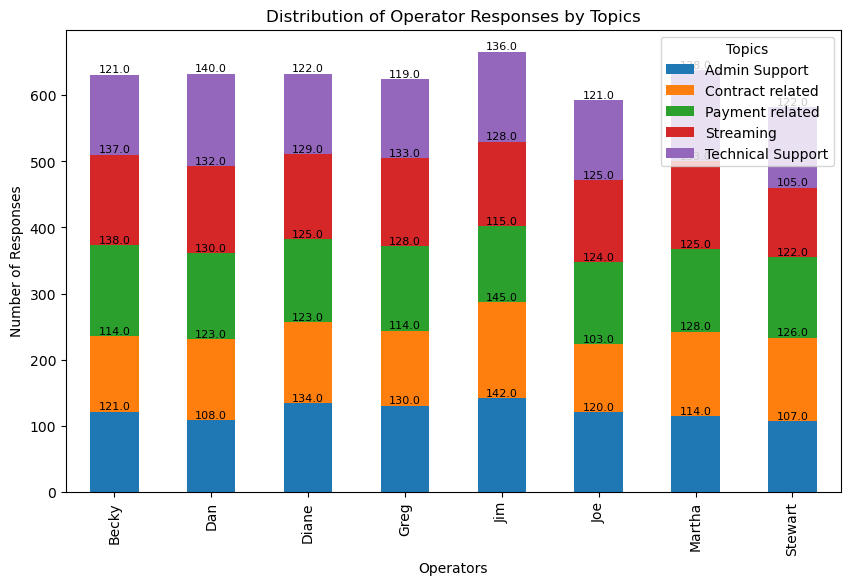

In [73]:
## Распределение ответов операторов по темам
## Создаем группировку данных по операторам и темам
operator_topic_counts = df.groupby(['Agent', 'Topic']).size().unstack(fill_value=0)

## Создаем столбчатую диаграмму
ax = operator_topic_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Operator Responses by Topics')
plt.xlabel('Operators')
plt.ylabel('Number of Responses')
plt.legend(title='Topics')

## Добавляем цифры внутрь столбцов
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center', va='bottom', fontsize=8)

plt.show()

In [74]:
## Смотрим процент решенных задач на каждую тему всеми операторами, по этому "рейтингу" будет видно, в каких вопросах
## сильенй тот или иной оператор

operatior_topics_stats = df.groupby(['Agent','Topic']).agg({
    'Resolved': 'sum',
    'Call Id': 'count',
    'Satisfaction rating': 'median'
})

operatior_topics_stats['Percent Resolved'] = (operatior_topics_stats['Resolved'] / operatior_topics_stats['Call Id']) * 100

operatior_topics_stats = operatior_topics_stats.sort_values(by=['Agent', 'Percent Resolved'], ascending=False)

operatior_topics_stats

Resolved  Call Id  Satisfaction rating  \
Agent   Topic                                                       
Stewart Technical Support        93      122                  4.0   
        Admin Support            80      107                  3.0   
        Streaming                77      105                  4.0   
        Contract related         92      126                  4.0   
        Payment related          82      122                  4.0   
Martha  Payment related          99      125                  4.0   
        Contract related         98      128                  3.0   
        Admin Support            83      114                  4.0   
        Technical Support        94      138                  4.0   
        Streaming                87      133                  4.0   
Joe     Technical Support        91      121                  3.0   
        Streaming                92      125                  3.0   
        Payment related          91      124                  3.5   
        Contract related         75      103                  4.0   
        Admin Support            87      120                  3.0   
Jim     Contract related        110      145                  3.0   
        Admin Support           106      142                  3.0   
        Technical Support        97      136                  4.0   
        Streaming                91      128                  4.0   
        Payment related          81      115                  3.5   
Greg    Payment related          99      128                  3.0   
        Streaming               100      133                  3.0   
        Contract related         83      114                  4.0   
        Admin Support            94      130                  3.0   
        Technical Support        79      119                  4.0   
Diane   Admin Support           103      134                  3.0   
        Streaming                96      129                  3.0   
        Technical Support        86      122                  3.0   
        Payment related          85      125                  4.0   
        Contract related         82      123                  4.0   
Dan     Streaming               101      132                  4.0   
        Technical Support       106      140                  4.0   
        Admin Support            80      108                  3.0   
        Contract related         91      123                  3.0   
        Payment related          93      130                  3.5   
Becky   Streaming               105      137                  3.0   
        Admin Support            90      121                  4.0   
        Technical Support        90      121                  3.0   
        Payment related          99      138                  4.0   
        Contract related         78      114                  4.0   

                           Percent Resolved  
Agent   Topic                                
Stewart Technical Support         76.229508  
        Admin Support             74.766355  
        Streaming                 73.333333  
        Contract related          73.015873  
        Payment related           67.213115  
Martha  Payment related           79.200000  
        Contract related          76.562500  
        Admin Support             72.807018  
        Technical Support         68.115942  
        Streaming                 65.413534  
Joe     Technical Support         75.206612  
        Streaming                 73.600000  
        Payment related           73.387097  
        Contract related          72.815534  
        Admin Support             72.500000  
Jim     Contract related          75.862069  
        Admin Support             74.647887  
        Technical Support         71.323529  
        Streaming                 71.093750  
        Payment related           70.434783  
Greg    Payment related           77.343750  
        Streaming                 75.187970  
        Contract related

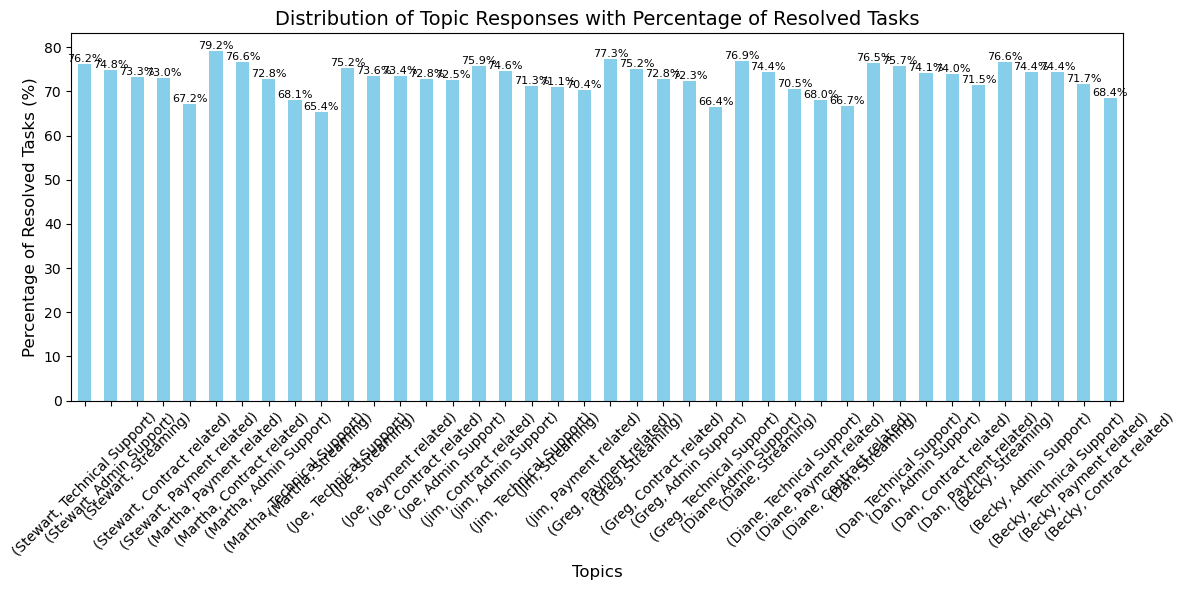

In [75]:
## Хоть в этом датасете всё понятно и по примеру выше - для наглядности создадим еще и график
plt.figure(figsize=(12, 6))
ax = operatior_topics_stats['Percent Resolved'].plot(kind='bar', color='skyblue')
plt.title('Distribution of Topic Responses with Percentage of Resolved Tasks', fontsize=14)
plt.xlabel('Topics', fontsize=12)  
plt.ylabel('Percentage of Resolved Tasks (%)', fontsize=12) 
plt.xticks(rotation=45, fontsize=10) 

## Добавляем проценты над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.tight_layout()  
plt.show()

In [76]:
## Смотрим на рейтинги и их кол-во у каждого оператора
operator_rating_count = df.groupby(['Agent','Satisfaction rating']).size().reset_index(name='Count')

operator_rating_count 

,Agent,Satisfaction rating,Count
0,Becky,1.0,64
1,Becky,2.0,42
2,Becky,3.0,150
3,Becky,4.0,160
4,Becky,5.0,101
5,Dan,1.0,49
6,Dan,2.0,47
7,Dan,3.0,166
8,Dan,4.0,143
9,Dan,5.0,118


In [77]:
## Есть ощущение, что данные сильно усреднены и в данном датасете рейтинг просто ни на что не влияет 

In [78]:
## Вернемся к рейтингам
low_satisfaction_ratings = df[(df['Satisfaction rating'] == 1) | (df['Satisfaction rating'] == 2)]

## Выведем значения столбца "Satisfaction rating" для каждого оператора, где рейтинг равен 1 или 2
low_satisfaction_ratings = low_satisfaction_ratings.groupby(['Agent','Topic'])['Satisfaction rating'].count()

print(low_satisfaction_ratings)

Agent    Topic            
Becky    Admin Support        18
         Contract related     22
         Payment related      20
         Streaming            26
         Technical Support    20
Dan      Admin Support        14
         Contract related     26
         Payment related      23
         Streaming            19
         Technical Support    14
Diane    Admin Support        23
         Contract related     19
         Payment related      17
         Streaming            21
         Technical Support    20
Greg     Admin Support        19
         Contract related     17
         Payment related      25
         Streaming            21
         Technical Support    18
Jim      Admin Support        24
         Contract related     24
         Payment related      25
         Streaming            16
         Technical Support    22
Joe      Admin Support        14
         Contract related     16
         Payment related      28
         Streaming            25
         Technic

In [79]:
median_speed_of_answer = df.groupby('Agent')['Speed of answer in seconds'].median()
avg_speed_of_answer = df.groupby('Agent')['Speed of answer in seconds'].mean()

# Выведем медианный показатель по скорости ответа на звонок у каждого оператора
print(median_speed_of_answer)
print(avg_speed_of_answer)

Agent
Becky      64.0
Dan        67.0
Diane      64.0
Greg       70.0
Jim        65.0
Joe        72.0
Martha     70.0
Stewart    65.0
Name: Speed of answer in seconds, dtype: float64
Agent
Becky      65.330754
Dan        67.282983
Diane      66.267465
Greg       68.444223
Jim        66.343284
Joe        70.987603
Martha     69.488327
Stewart    66.184486
Name: Speed of answer in seconds, dtype: float64


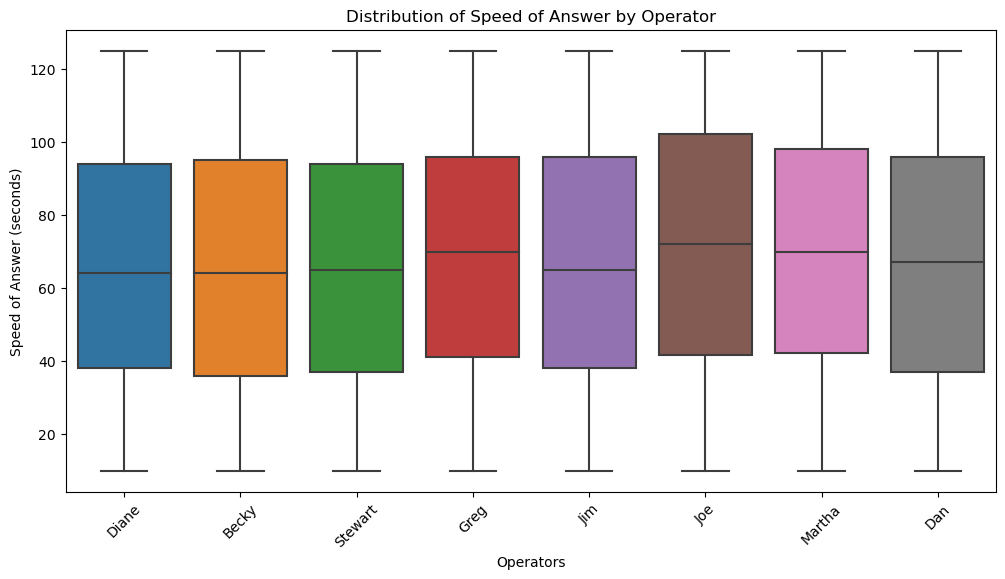

In [80]:
## Создадим бокплот, что бы отобразить медиану и выбросы для времени ответа на звонок
plt.figure(figsize=(12, 6))
sns.boxplot(x='Agent', y='Speed of answer in seconds', data=df)
plt.title('Distribution of Speed of Answer by Operator')
plt.xlabel('Operators')
plt.ylabel('Speed of Answer (seconds)')
plt.xticks(rotation=45)
plt.show()

In [81]:
## Со скоростью ответа у всех всё одинакого, разве что Joe отвечает чуть дольше остальных

In [82]:
## Смотрим процент решенных задач на каждую тему всеми операторами

operatior_topics_stats = df.groupby(['Agent','Topic']).agg({
    'Resolved': 'sum',
    'Call Id': 'count',
    'Satisfaction rating': 'median'
})

operatior_topics_stats['Percent Resolved'] = (operatior_topics_stats['Resolved'] / operatior_topics_stats['Call Id']) * 100

operatior_topics_stats = operatior_topics_stats.sort_values(by=['Agent', 'Percent Resolved'], ascending=False)

operatior_topics_stats

Resolved  Call Id  Satisfaction rating  \
Agent   Topic                                                       
Stewart Technical Support        93      122                  4.0   
        Admin Support            80      107                  3.0   
        Streaming                77      105                  4.0   
        Contract related         92      126                  4.0   
        Payment related          82      122                  4.0   
Martha  Payment related          99      125                  4.0   
        Contract related         98      128                  3.0   
        Admin Support            83      114                  4.0   
        Technical Support        94      138                  4.0   
        Streaming                87      133                  4.0   
Joe     Technical Support        91      121                  3.0   
        Streaming                92      125                  3.0   
        Payment related          91      124                  3.5   
        Contract related         75      103                  4.0   
        Admin Support            87      120                  3.0   
Jim     Contract related        110      145                  3.0   
        Admin Support           106      142                  3.0   
        Technical Support        97      136                  4.0   
        Streaming                91      128                  4.0   
        Payment related          81      115                  3.5   
Greg    Payment related          99      128                  3.0   
        Streaming               100      133                  3.0   
        Contract related         83      114                  4.0   
        Admin Support            94      130                  3.0   
        Technical Support        79      119                  4.0   
Diane   Admin Support           103      134                  3.0   
        Streaming                96      129                  3.0   
        Technical Support        86      122                  3.0   
        Payment related          85      125                  4.0   
        Contract related         82      123                  4.0   
Dan     Streaming               101      132                  4.0   
        Technical Support       106      140                  4.0   
        Admin Support            80      108                  3.0   
        Contract related         91      123                  3.0   
        Payment related          93      130                  3.5   
Becky   Streaming               105      137                  3.0   
        Admin Support            90      121                  4.0   
        Technical Support        90      121                  3.0   
        Payment related          99      138                  4.0   
        Contract related         78      114                  4.0   

                           Percent Resolved  
Agent   Topic                                
Stewart Technical Support         76.229508  
        Admin Support             74.766355  
        Streaming                 73.333333  
        Contract related          73.015873  
        Payment related           67.213115  
Martha  Payment related           79.200000  
        Contract related          76.562500  
        Admin Support             72.807018  
        Technical Support         68.115942  
        Streaming                 65.413534  
Joe     Technical Support         75.206612  
        Streaming                 73.600000  
        Payment related           73.387097  
        Contract related          72.815534  
        Admin Support             72.500000  
Jim     Contract related          75.862069  
        Admin Support             74.647887  
        Technical Support         71.323529  
        Streaming                 71.093750  
        Payment related           70.434783  
Greg    Payment related           77.343750  
        Streaming                 75.187970  
        Contract related

In [83]:
## Тут становится яснее хотя бы то, что определенные операторы лучше разбираются в каки-либо темах

In [84]:
## Суммарно напрашивается вывод, что на Satisfaction rating смотреть не нужно, он так же примерно одинаков у всех, возможно если
## поставить операторов на темы звонков, в которых они сильнее, то это косвенно повлияет на Satisfaction rating.

In [85]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,1,1,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,1,0,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,1,1,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,1,1,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,1,1,95.0,00:01:00,3.0
